In [1]:
# Task 2
"""
Objectives:
- Create a function to take in new data files in similar format to dna_raw.txt with different number of sequences, and produce the same results
- Also deal with dna_raw_complicated.txt file

PREAMBLE:
For task 2, I changed the code structure. My task1 code had to be included, with few modifications,
into the function with the return value closing it all.

Ideas and help I got:
At the Stuga, while discussing with Kokchun and Johny, I realized that I had too many functions that would 
need to be called and that it was needed.
I had also "hardcoded" (a term that Kokchun mentioned and that I did not know what it meant) one file 
name a part of the code while I intended to use the parameter (file_name) only. 

For Regex, I took \d+ from https://www.tutorialspoint.com/how-does-regular-expression-work-in-python 
we saw \d in a lecture (video) but I did not know "\d+"

I found out about FASTA format with sequence identifiers starting with carat ">" at https://www.ncbi.nlm.nih.gov/genbank/fastaformat/ 
so I searched and found the method .startswith() at https://www.tutorialspoint.com/python/string_startswith.htm
and the function re.match at https://www.geeksforgeeks.org/python/re-match-in-python/
"""

import re
import matplotlib.pyplot as plt

def find_sequences_in(file_name):   
       
    with open(file_name, "r") as f:     
        data = f.read()
        print(f"The printed text:\n {data}")

    lines = data.lower().split("\n")    # Splitting lines, no white spaces
    
    seq_letters = []  
    seq_n = []
    all_sequences = {}

    for line in lines:
        if line.startswith(">") and re.match(r">seq\d+", line): # finding the symbol, matching pattern at the beginning of a str
            seq_n = line
            all_sequences[seq_n] = ""     #seq_n becomes the keys of the dict all_sequences and and the value is empty
        elif seq_n and line:
            all_sequences[seq_n] += line.replace(" ", "") # counts one more line
        
            

    print()
    print("---------DNA Sequence Data: Dictionaries and Bar Charts-------")
    print()
    
    #letters_counts_all ={}
    for seq_n, letters in all_sequences.items():
        letter_counts = {"a": 0, "c": 0, "g": 0, "t": 0}

        for letter in letters:
            if letter in letter_counts:
                letter_counts[letter] +=1

        print(f"{seq_n.lstrip('>')} = {letter_counts}")

        fig, ax = plt.subplots()                            # bar chart creation, removed a function that I used at first after talking at the stuga
        dna_letters = list(letter_counts.keys())
        frequency = list(letter_counts.values())
        bar_colors = ['tab:red']
        ax.bar(dna_letters, frequency, color=bar_colors)
        plt.xlabel("DNA Letters")
        ax.set_ylabel("Frequency")
        ax.set_title(f"DNA {seq_n.lstrip('>')}")
        plt.show()

    return all_sequences

<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\d'
C:\Users\girau\AppData\Local\Temp\ipykernel_21956\2695702529.py:17: SyntaxWarning: invalid escape sequence '\d'
  For Regex, I took \d+ from https://www.tutorialspoint.com/how-does-regular-expression-work-in-python


The printed text:
 >seq1
cGTAaccaataaaaaaacaagcttaacctaattc
>seq2
agcttagTTTGGatctggccgggg
>seq3
gcggatttactcCCCCCAAAAANNaggggagagcccagataaatggagtctgtgcgtccaca
gaattcgcacca
AATAAAACCTCACCCAT
agagcccagaatttactcCCC
>seq4
gcggatttactcaggggagagcccagGGataaatggagtctgtgcgtccaca
gaattcgcacca

---------DNA Sequence Data: Dictionaries and Bar Charts-------

seq1 = {'a': 17, 'c': 8, 'g': 2, 't': 7}


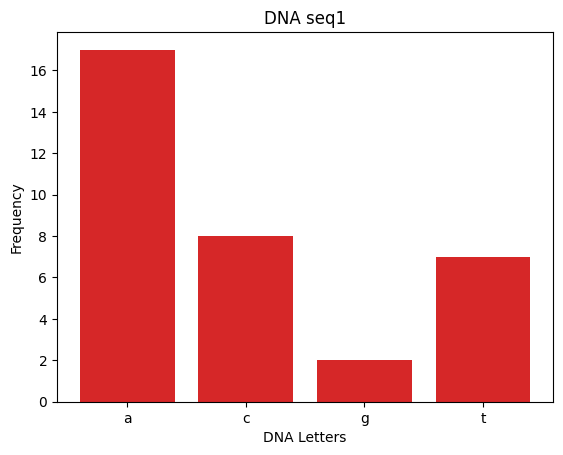

seq2 = {'a': 3, 'c': 4, 'g': 10, 't': 7}


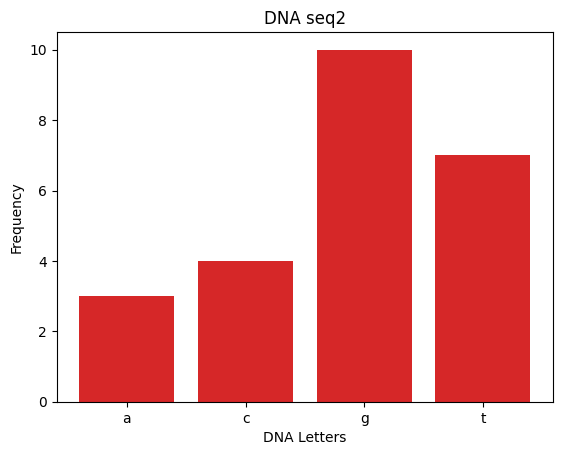

seq3 = {'a': 36, 'c': 34, 'g': 21, 't': 19}


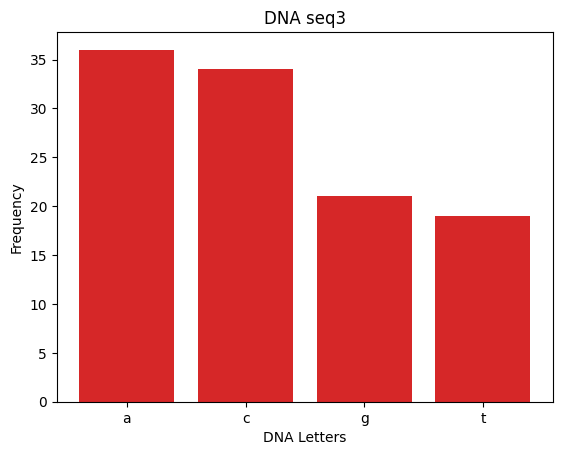

seq4 = {'a': 17, 'c': 15, 'g': 20, 't': 12}


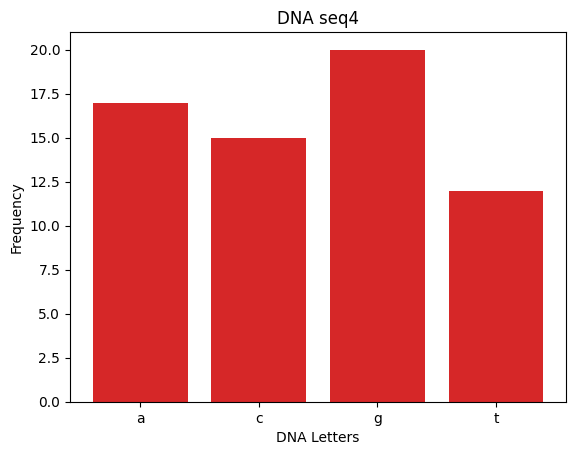

{'>seq1': 'cgtaaccaataaaaaaacaagcttaacctaattc',
 '>seq2': 'agcttagtttggatctggccgggg',
 '>seq3': 'gcggatttactccccccaaaaannaggggagagcccagataaatggagtctgtgcgtccacagaattcgcaccaaataaaacctcacccatagagcccagaatttactcccc',
 '>seq4': 'gcggatttactcaggggagagcccagggataaatggagtctgtgcgtccacagaattcgcacca'}

In [2]:
find_sequences_in("dna_raw_complicated.txt")